<body>
<div class="main">
      <h2><font size="8"color="teal">Shaan Ahmed</font></h2>
      <p><font size="5"color="#FFC300">A student of BCA (Hons.) AI and Data Science (IBM)  5th Semester.<br>E-mail: shaanahmed003@gmail.com</font></p>
      <img src="WhatsApp Image 2023-11-21 at 20.24.14_d31b7dc1 (1).jpg" alt="My Image">
    </div>

<h3>
   <font  size="4"> LinkedIn Proile URL: </font>
  <div class="navbar">
    <a href="#">   https://t.ly/fYuDy</a>
    <a href="#" class="right">Link</a>
  </div></h3>
   <div class="header">
    <h1><font size="10"color="teal">Household Power Consumption Project</font></h1>
    <p><font size="5"color="#FFC300"><strong>I built a Linear Regression model using Python.</strong></font></p>
   </div>
  <div class="row">
    <div class="side">
      <h2><font size="5"color="#FFC300">Tasks Performed: </font></h2>
      <p><font size="4"color="olive">Data Ingestion <br> Data Cleaning <br> EDA <br> Data Preprocessing <br> Model Building</font></p>
    </div>
    
</body>


<font size="6" color="teal">1. Problem statement</font>

<font size="4" color="grey">This dataset contains Minute by minute powerconsumption data for a Single household in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months). I used a dataset that contains the power consumption of a household over four years. I performed Exploratory Data Analysis (EDA) and Data Preprocessing to understand and clean the data. I then applied Linear Regression to predict the power consumption based on various features, such as voltage, current, and sub-metering. I evaluated the performance of the model using metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared (R2).</font>

<font size="6" color="teal">2. Data collection</font>

<font size="4" color="grey">The dataset was collected from the UCI ML repository.Link for the dataset- https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption</font>

<font size="6" color="teal">3. Data Ingestion</font>

<font size="4" color="grey">Importing the necessary libraries</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('household_power_consumption.txt',sep=';')

In [3]:
df.head()

Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0

In [4]:
df.shape

(2075259, 9)

<font size="6" color="teal">4. Data Cleaning</font>

<font size="4" color="grey">Data cleaning is the process of identifying and fixing or removing errors, inconsistencies, and inaccuracies in the data to improve its quality and usability.</font>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [6]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [7]:
df_sample=df.sample(100000)

In [8]:
df_sample.head()

Date      Time Global_active_power Global_reactive_power  \
106226    28/2/2007  11:50:00               0.216                 0.000   
341835    11/8/2007  02:39:00               0.212                 0.116   
1093639   14/1/2009  04:43:00               0.240                 0.000   
1549934  27/11/2009  01:38:00               0.290                 0.000   
924935    19/9/2008  00:59:00               0.322                 0.140   

         Voltage Global_intensity Sub_metering_1 Sub_metering_2  \
106226   241.030            0.800          0.000          0.000   
341835   234.250            1.000          0.000          0.000   
1093639  247.980            1.000          0.000          0.000   
1549934  240.810            1.400          0.000          0.000   
924935   242.080            1.400          1.000          0.000   

         Sub_metering_3  
106226              0.0  
341835              0.0  
1093639             0.0  
1549934             1.0  
924935              1.0

In [9]:
df_sample.reset_index(inplace=True,drop=True)

In [10]:
df_sample.head()

Date      Time Global_active_power Global_reactive_power  Voltage  \
0   28/2/2007  11:50:00               0.216                 0.000  241.030   
1   11/8/2007  02:39:00               0.212                 0.116  234.250   
2   14/1/2009  04:43:00               0.240                 0.000  247.980   
3  27/11/2009  01:38:00               0.290                 0.000  240.810   
4   19/9/2008  00:59:00               0.322                 0.140  242.080   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0            0.800          0.000          0.000             0.0  
1            1.000          0.000          0.000             0.0  
2            1.000          0.000          0.000             0.0  
3            1.400          0.000          0.000             1.0  
4            1.400          1.000          0.000             1.0

In [11]:
df_sample.shape

(100000, 9)

In [12]:
df_sample.isnull().sum()

Date                        0
Time                        0
Global_active_power         0
Global_reactive_power       0
Voltage                     0
Global_intensity            0
Sub_metering_1              0
Sub_metering_2              0
Sub_metering_3           1253
dtype: int64

In [13]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   100000 non-null  object 
 1   Time                   100000 non-null  object 
 2   Global_active_power    100000 non-null  object 
 3   Global_reactive_power  100000 non-null  object 
 4   Voltage                100000 non-null  object 
 5   Global_intensity       100000 non-null  object 
 6   Sub_metering_1         100000 non-null  object 
 7   Sub_metering_2         100000 non-null  object 
 8   Sub_metering_3         98747 non-null   float64
dtypes: float64(1), object(8)
memory usage: 6.9+ MB


In [14]:
df_sample['Global_active_power'] = pd.to_numeric(df_sample['Global_active_power'], errors='coerce')
df_sample['Global_reactive_power'] = pd.to_numeric(df_sample['Global_reactive_power'], errors='coerce')
df_sample['Voltage'] = pd.to_numeric(df_sample['Voltage'], errors='coerce')
df_sample['Global_intensity'] = pd.to_numeric(df_sample['Global_intensity'], errors='coerce')
df_sample['Sub_metering_1'] = pd.to_numeric(df_sample['Sub_metering_1'], errors='coerce')
df_sample['Sub_metering_2'] = pd.to_numeric(df_sample['Sub_metering_2'], errors='coerce')

In [15]:
df_sample['Global_active_power'].fillna(df_sample['Global_active_power'].mean(),inplace=True)
df_sample['Global_reactive_power'].fillna(df_sample['Global_reactive_power'].mean(),inplace=True)
df_sample['Voltage'].fillna(df_sample['Voltage'].mean(),inplace=True)
df_sample['Global_intensity'].fillna(df_sample['Global_intensity'].mean(),inplace=True)
df_sample['Sub_metering_1'].fillna(df_sample['Sub_metering_1'].mean(),inplace=True)
df_sample['Sub_metering_2'].fillna(df_sample['Sub_metering_2'].mean(),inplace=True)
df_sample['Sub_metering_3'].fillna(df_sample['Sub_metering_3'].mean(),inplace=True)
     

In [16]:
df_sample['Date']=pd.to_datetime(df_sample['Date'])
df_sample['Day']=df_sample['Date'].dt.day
df_sample['Month']=df_sample['Date'].dt.month
df_sample['Year']=df_sample['Date'].dt.year

In [17]:
df_sample['Hour']=pd.to_datetime(df_sample['Time'],format='%H:%M:%S').dt.hour
df_sample['Minutes']=pd.to_datetime(df_sample['Time'],format='%H:%M:%S').dt.minute

In [18]:
df_sample.head()

Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0 2007-02-28  11:50:00                0.216                  0.000   241.03   
1 2007-08-11  02:39:00                0.212                  0.116   234.25   
2 2009-01-14  04:43:00                0.240                  0.000   247.98   
3 2009-11-27  01:38:00                0.290                  0.000   240.81   
4 2008-09-19  00:59:00                0.322                  0.140   242.08   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  Day  \
0               0.8             0.0             0.0             0.0   28   
1               1.0             0.0             0.0             0.0   11   
2               1.0             0.0             0.0             0.0   14   
3               1.4             0.0             0.0             1.0   27   
4               1.4             1.0             0.0             1.0   19   

   Month  Year  Hour  Minutes  
0      2  2007    11       50  
1      8  2007     2       39  
2      1  2009     4       43  
3     11  2009     1       38  
4      9  2008     0       59

In [19]:
df_sample.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Day                      0
Month                    0
Year                     0
Hour                     0
Minutes                  0
dtype: int64

In [20]:
df.duplicated().sum()

0

In [21]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Date                   100000 non-null  datetime64[ns]
 1   Time                   100000 non-null  object        
 2   Global_active_power    100000 non-null  float64       
 3   Global_reactive_power  100000 non-null  float64       
 4   Voltage                100000 non-null  float64       
 5   Global_intensity       100000 non-null  float64       
 6   Sub_metering_1         100000 non-null  float64       
 7   Sub_metering_2         100000 non-null  float64       
 8   Sub_metering_3         100000 non-null  float64       
 9   Day                    100000 non-null  int32         
 10  Month                  100000 non-null  int32         
 11  Year                   100000 non-null  int32         
 12  Hour                   100000 non-null  int32

<font size="4" color="blue">Creating column for total metering</font>

In [22]:
df_sample['Total_metering']=df_sample['Sub_metering_1']+df_sample['Sub_metering_2']+df_sample['Sub_metering_3']

In [23]:
df_sample.head()

Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0 2007-02-28  11:50:00                0.216                  0.000   241.03   
1 2007-08-11  02:39:00                0.212                  0.116   234.25   
2 2009-01-14  04:43:00                0.240                  0.000   247.98   
3 2009-11-27  01:38:00                0.290                  0.000   240.81   
4 2008-09-19  00:59:00                0.322                  0.140   242.08   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  Day  \
0               0.8             0.0             0.0             0.0   28   
1               1.0             0.0             0.0             0.0   11   
2               1.0             0.0             0.0             0.0   14   
3               1.4             0.0             0.0             1.0   27   
4               1.4             1.0             0.0             1.0   19   

   Month  Year  Hour  Minutes  Total_metering  
0      2  2007    11       50             0.0  
1      8  2007     2       39             0.0  
2      1  2009     4       43             0.0  
3     11  2009     1       38             1.0  
4      9  2008     0       59             2.0

<font size="4" color="blue">Dropping the unwanted columns from the dataset</font>

In [24]:
df_sample.drop(columns=['Date','Time','Sub_metering_1', 'Sub_metering_2','Sub_metering_3'],inplace=True)

In [25]:
df_sample.head()

Global_active_power  Global_reactive_power  Voltage  Global_intensity  Day  \
0                0.216                  0.000   241.03               0.8   28   
1                0.212                  0.116   234.25               1.0   11   
2                0.240                  0.000   247.98               1.0   14   
3                0.290                  0.000   240.81               1.4   27   
4                0.322                  0.140   242.08               1.4   19   

   Month  Year  Hour  Minutes  Total_metering  
0      2  2007    11       50             0.0  
1      8  2007     2       39             0.0  
2      1  2009     4       43             0.0  
3     11  2009     1       38             1.0  
4      9  2008     0       59             2.0

<font size="6" color="teal">5. EDA </font>

<font size="4" color="grey">EDA, or Exploratory Data Analysis, is a crucial step in machine learning that involves analyzing and visualizing the data to understand its characteristics, patterns, relationships, and quality.  </font>

Features information

In [26]:
df_sample.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Day', 'Month', 'Year', 'Hour', 'Minutes',
       'Total_metering'],
      dtype='object')

In [27]:
df_sample.describe().T

count         mean        std       min      25%  \
Global_active_power    100000.0     1.095957   1.054782     0.078     0.31   
Global_reactive_power  100000.0     0.123563   0.112091     0.000     0.05   
Voltage                100000.0   240.829435   3.239455   224.420   239.00   
Global_intensity       100000.0     4.646981   4.434464     0.200     1.40   
Day                    100000.0    15.838410   8.806129     1.000     8.00   
Month                  100000.0     6.458290   3.421225     1.000     3.00   
Year                   100000.0  2008.434390   1.130658  2006.000  2007.00   
Hour                   100000.0    11.474820   6.907922     0.000     6.00   
Minutes                100000.0    29.526820  17.316538     0.000    15.00   
Total_metering         100000.0     8.915390  12.776928     0.000     0.00   

                            50%        75%       max  
Global_active_power       0.642     1.5185     9.686  
Global_reactive_power     0.102     0.1920     1.190  
Voltage                 240.960   242.8500   253.940  
Global_intensity          2.800     6.4000    42.000  
Day                      16.000    23.0000    31.000  
Month                     6.000     9.0000    12.000  
Year                   2008.000  2009.0000  2010.000  
Hour                     11.000    17.0000    23.000  
Minutes                  29.000    45.0000    59.000  
Total_metering            1.000    18.0000   133.000

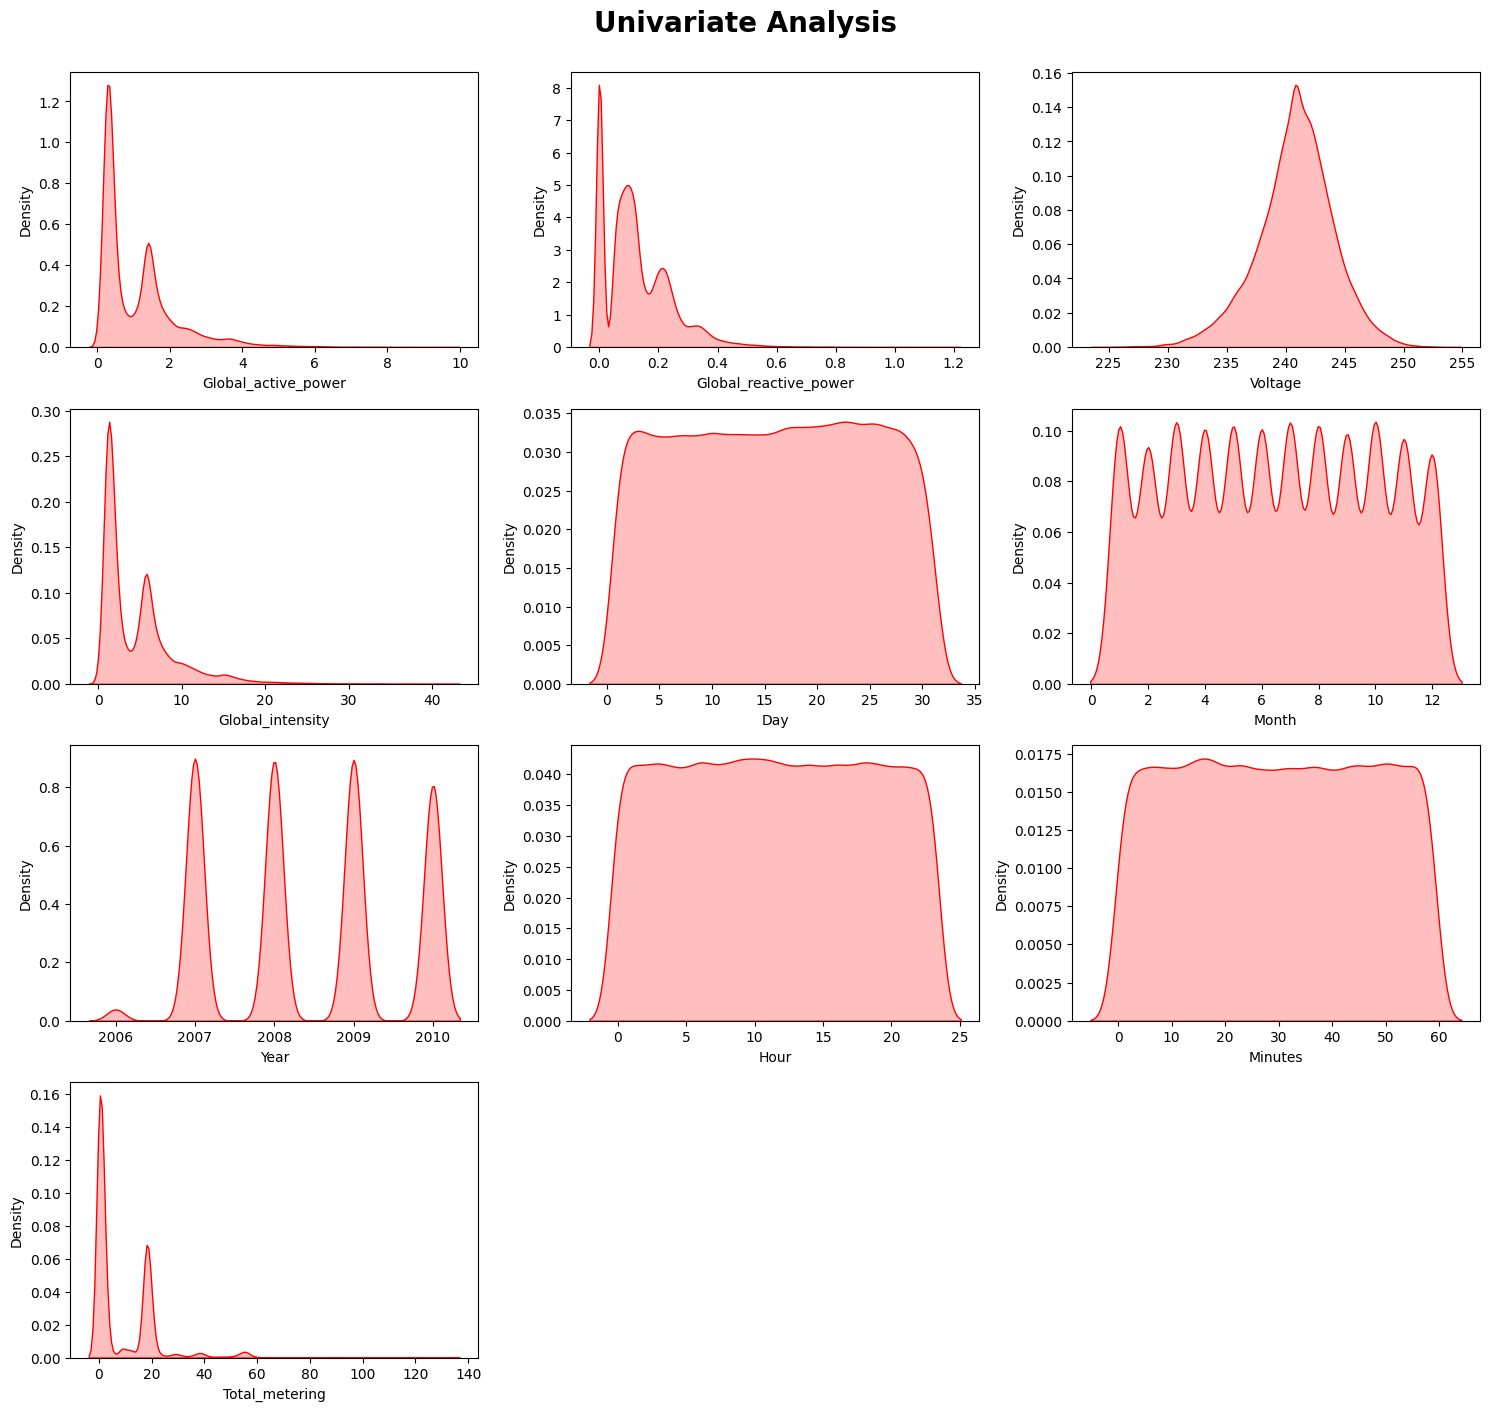

In [28]:
plt.figure(figsize=(15,17))
plt.suptitle("Univariate Analysis",fontsize=20,fontweight='bold',y=1)
for i in range(0,len(df_sample.columns)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df_sample[df_sample.columns[i]],shade=True,color='r')
    plt.xlabel(df_sample.columns[i])
    plt.tight_layout()

<font size="4" color="grey"><strong>Observations:</strong></font>

Global_active_power- Power is distributed between 0 to 8. Most of the power distributed between 0  o 2Global_reactive_power-Reactive power is distributed between 0 to 0.8. Most of the power distributed between 0 to 2. 2.
Voltage= Vlotage is distributed between 230 to 250, most of the voltage distributed between 0 to 10.
Global_intensity- Intensity is distributed between 0 to 20. Most of the intensity distrubuted between 0 t o 10.
Total_metering= metering is distributed between 0 to 60 most of the distribution is between 0 
to 25./ul>


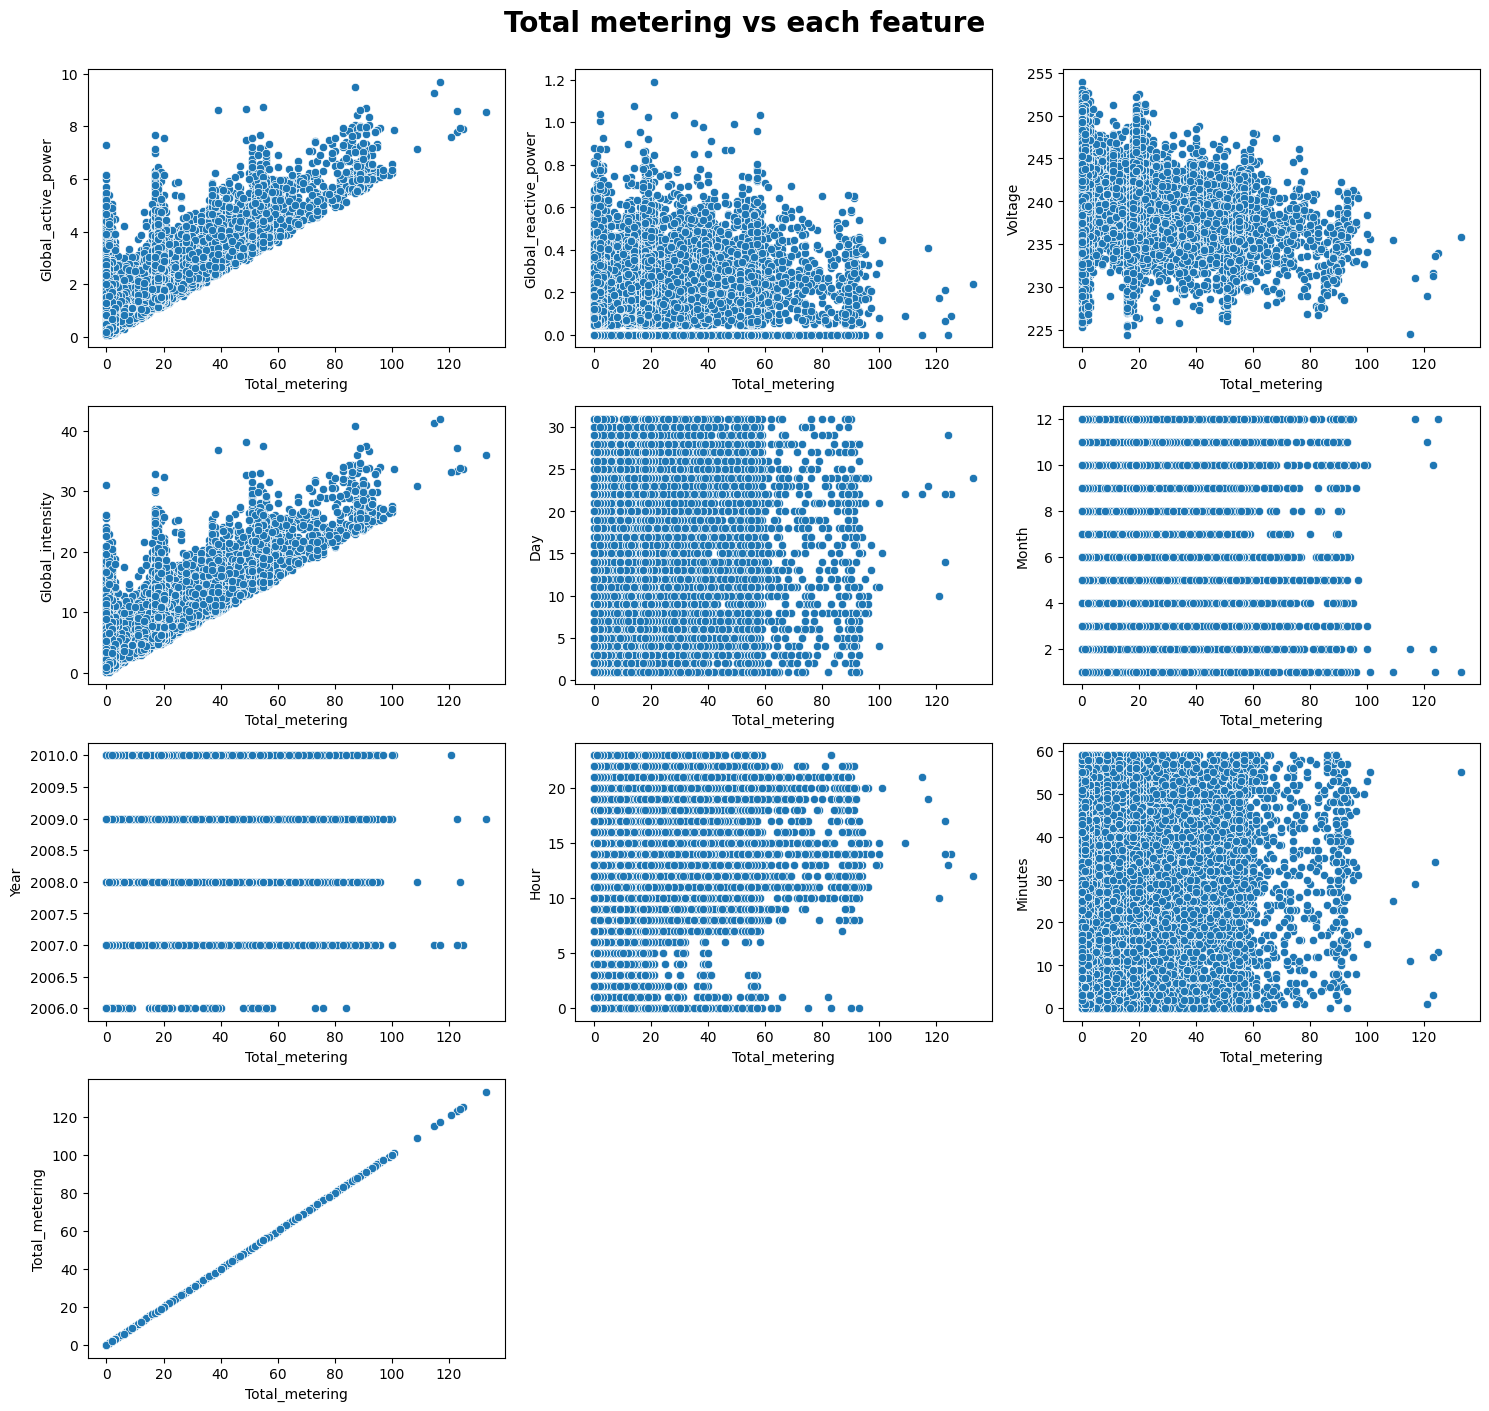

In [29]:
#Realtion of each feature with Total_metering
plt.figure(figsize=(15,17))
plt.suptitle("Total metering vs each feature",fontsize=20,fontweight='bold',y=1)
for i in range(0,len(df_sample.columns)):
    plt.subplot(5,3,i+1)
    sns.scatterplot(x=df_sample['Total_metering'],y=df_sample[df_sample.columns[i]])
    plt.ylabel(df_sample.columns[i])
    plt.xlabel('Total_metering')
    plt.tight_layout()

<Axes: xlabel='Year', ylabel='Reading in watt-hour'>

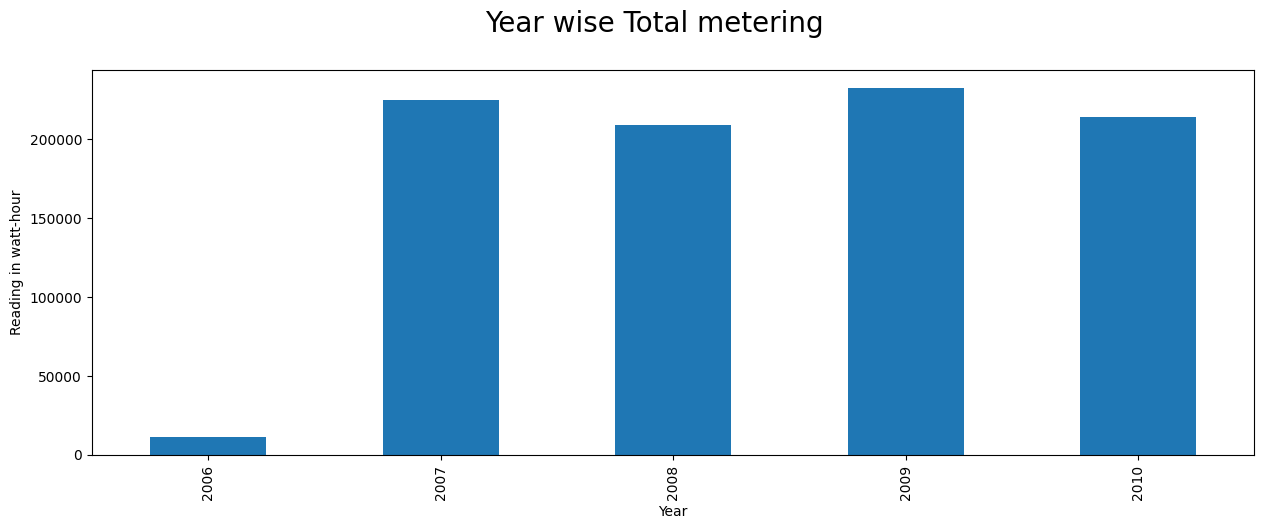

In [30]:
#Year wise Total_metering
plt.figure(figsize=(15,5))
plt.suptitle("Year wise Total metering",fontsize=20,y=1)
df_sample.groupby(df_sample.Year)['Total_metering'].sum().plot(kind='bar',xlabel='Year',ylabel='Reading in watt-hour')

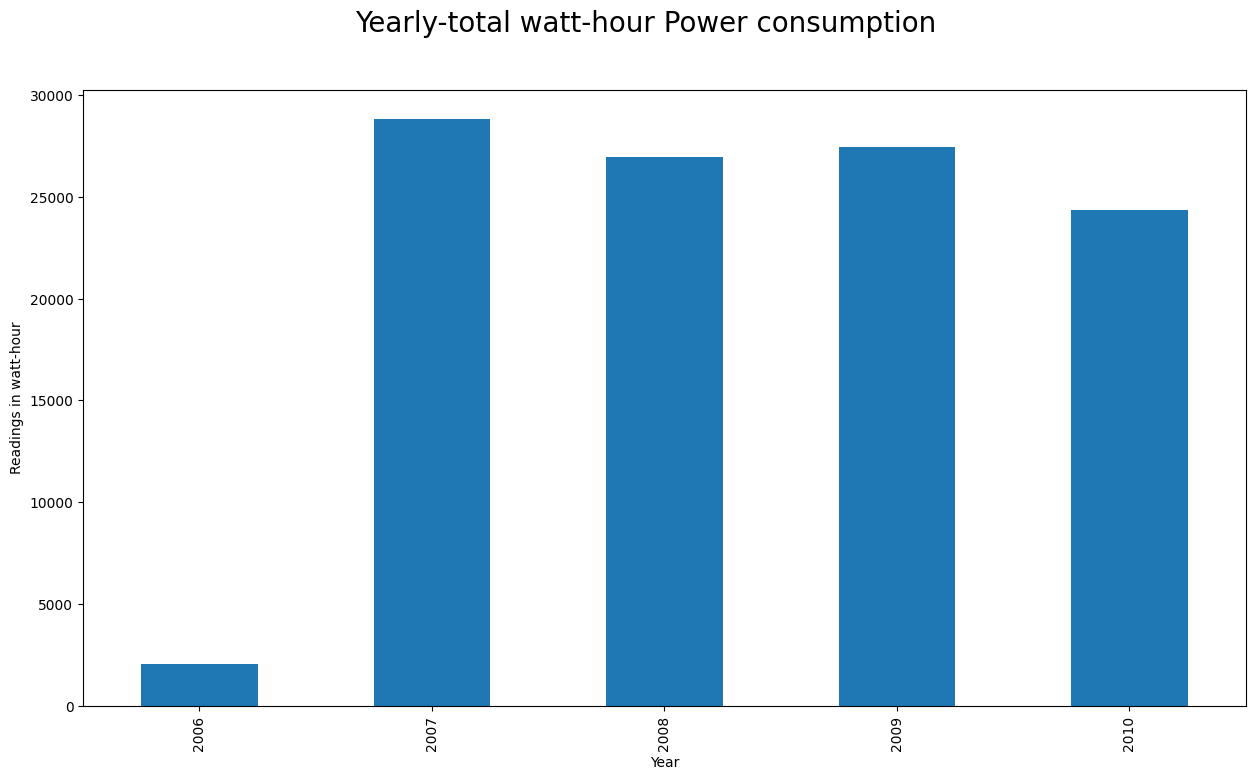

In [31]:
#Year wse total power consumption
plt.figure(figsize=(15,8))
plt.suptitle('Yearly-total watt-hour Power consumption',fontsize=20)
df_sample.groupby(df_sample.Year)['Global_active_power'].sum().plot(kind='bar',xlabel='Year',ylabel='Readings in watt-hour')
plt.show()


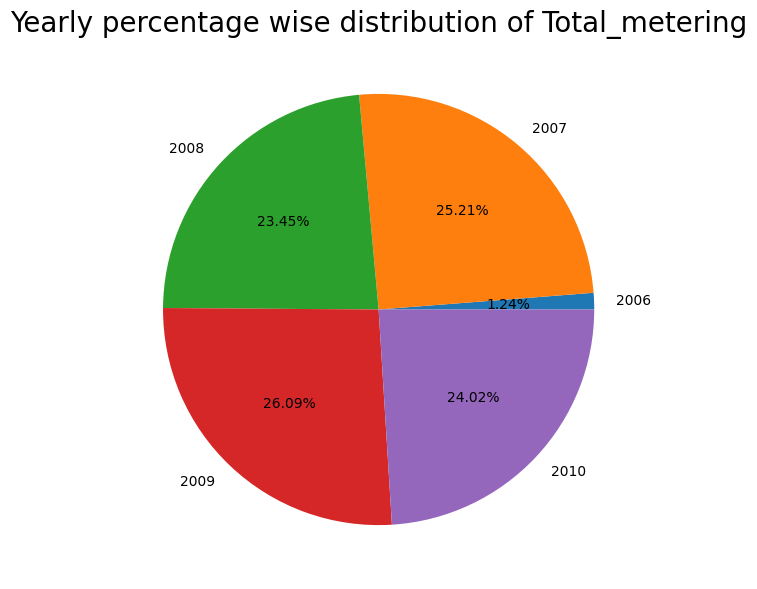

In [32]:
plt.figure(figsize=(7,7))
year_labels= [2006,2007,2008,2009,2010]
plt.pie(x=df_sample.groupby(df_sample['Year'])['Total_metering'].sum(),autopct='%1.2f%%',labels=year_labels)
plt.title('Yearly percentage wise distribution of Total_metering',fontsize=20)
plt.show()

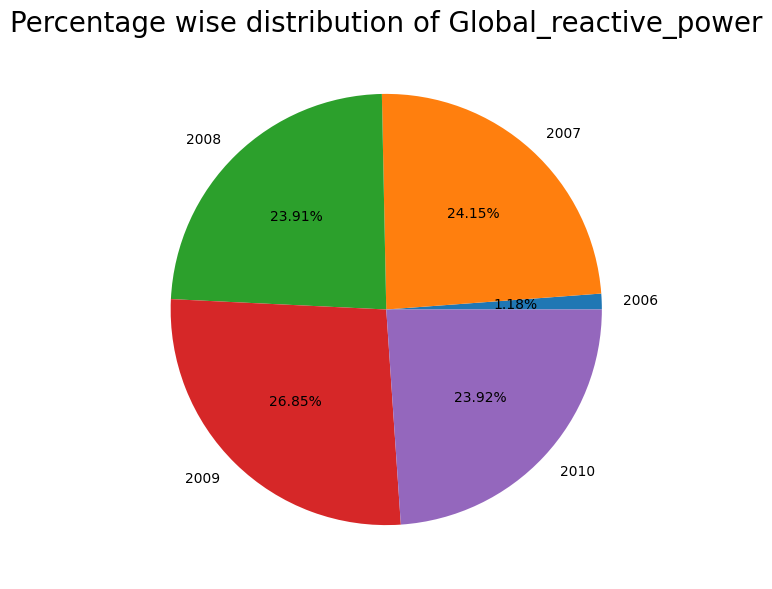

In [33]:
plt.figure(figsize=(7,7))
year_labels= [2006,2007,2008,2009,2010]
plt.pie(x=df_sample.groupby(df_sample['Year'])['Global_reactive_power'].sum(),autopct='%1.2f%%',labels=year_labels)
plt.title('Percentage wise distribution of Global_reactive_power',fontsize=20)
plt.show()

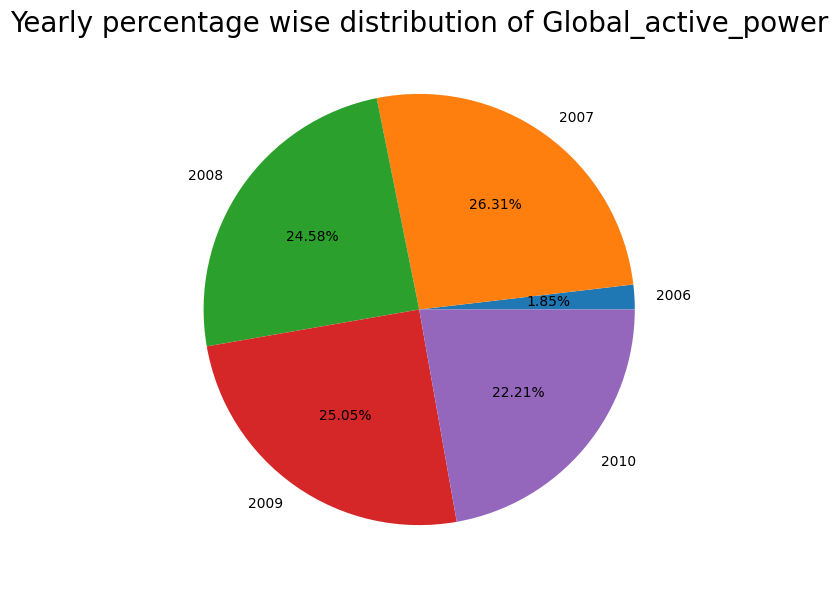

In [34]:
plt.figure(figsize=(7,7))
year_labels= [2006,2007,2008,2009,2010]
plt.pie(x=df_sample.groupby(df_sample['Year'])['Global_active_power'].sum(),autopct='%1.2f%%',labels=year_labels)
plt.title('Yearly percentage wise distribution of Global_active_power',fontsize=20)
plt.show()

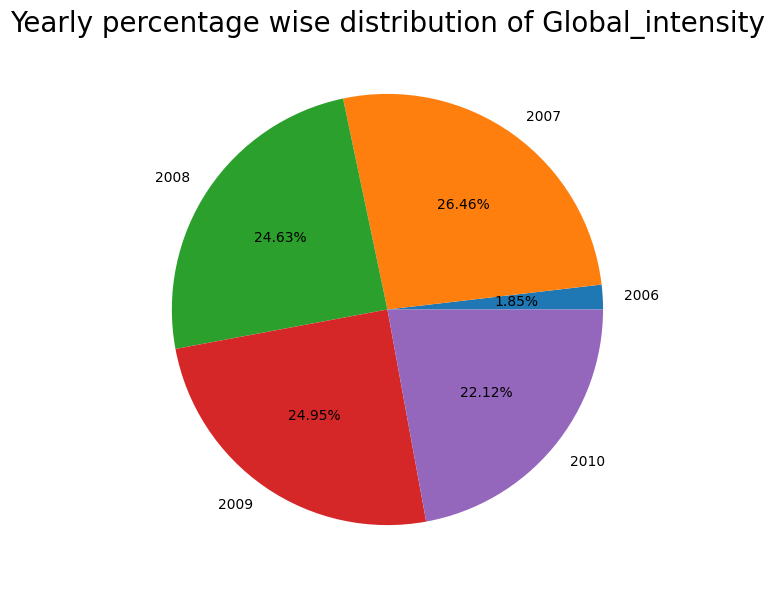

In [35]:
plt.figure(figsize=(7,7))
year_labels= [2006,2007,2008,2009,2010]
plt.pie(x=df_sample.groupby(df_sample['Year'])['Global_intensity'].sum(),autopct='%1.2f%%',labels=year_labels)
plt.title('Yearly percentage wise distribution of Global_intensity',fontsize=20)
plt.show()

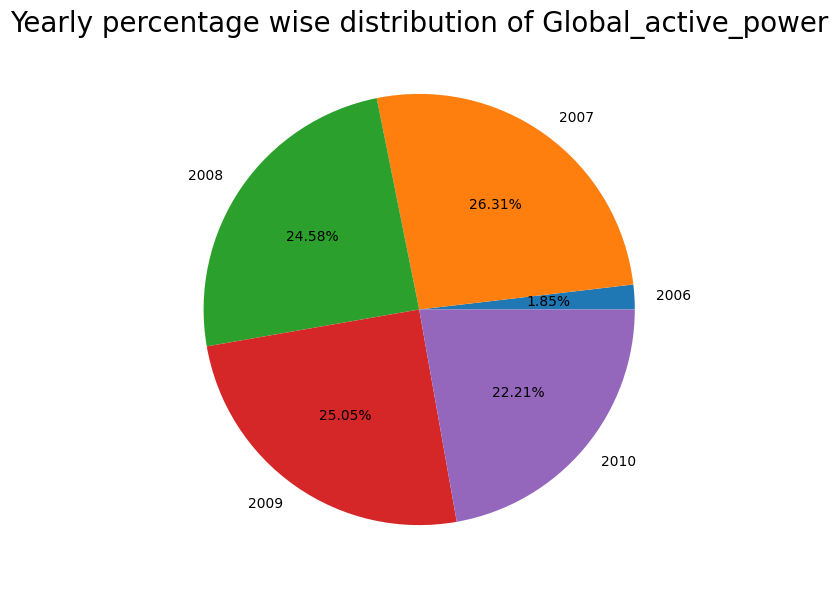

In [36]:
plt.figure(figsize=(7,7))
year_labels= [2006,2007,2008,2009,2010]
plt.pie(x=df_sample.groupby(df_sample['Year'])['Global_active_power'].sum(),autopct='%1.2f%%',labels=year_labels)
plt.title('Yearly percentage wise distribution of Global_active_power',fontsize=20)
plt.show()

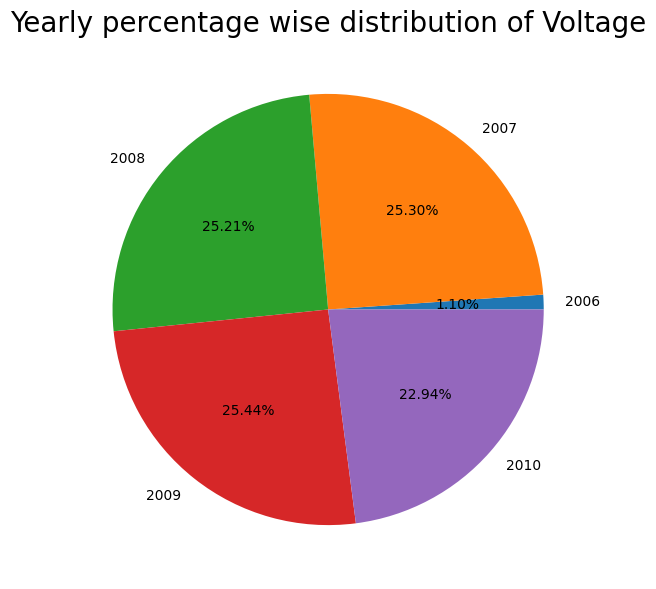

In [37]:
plt.figure(figsize=(7,7))
year_labels= [2006,2007,2008,2009,2010]
plt.pie(x=df_sample.groupby(df_sample['Year'])['Voltage'].sum(),autopct='%1.2f%%',labels=year_labels)
plt.title('Yearly percentage wise distribution of Voltage',fontsize=20)
plt.show()

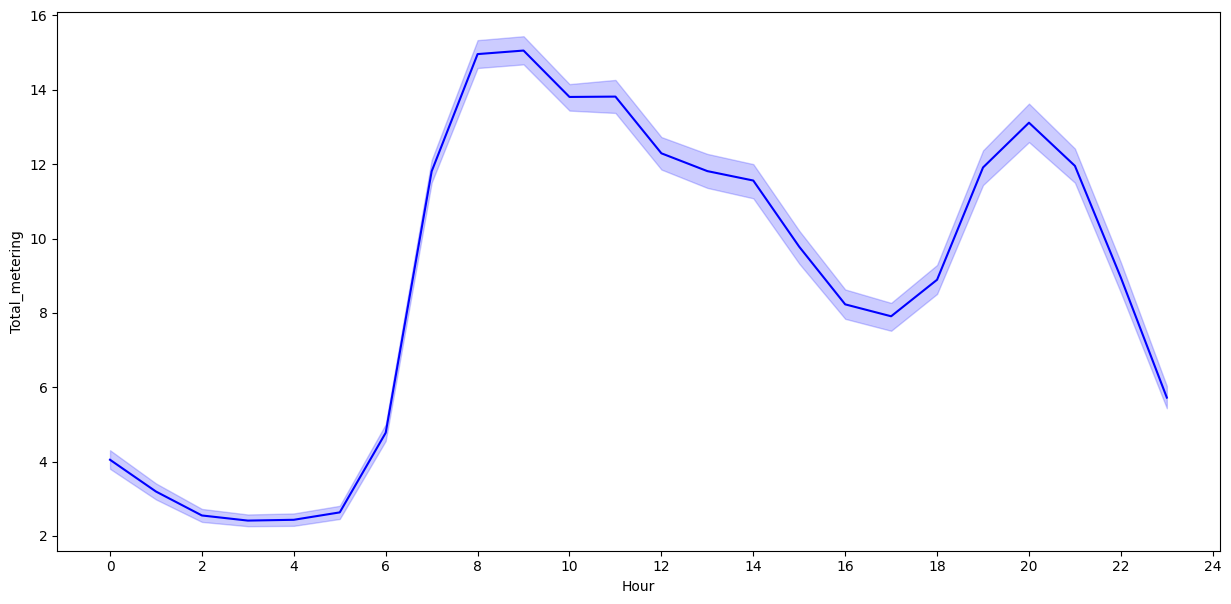

In [38]:
plt.figure(figsize=(15,7))
sns.lineplot(x='Hour',y='Total_metering',data=df_sample,color='blue')
list = np.arange(0,26,2)
plt.xticks(list)
plt.show()

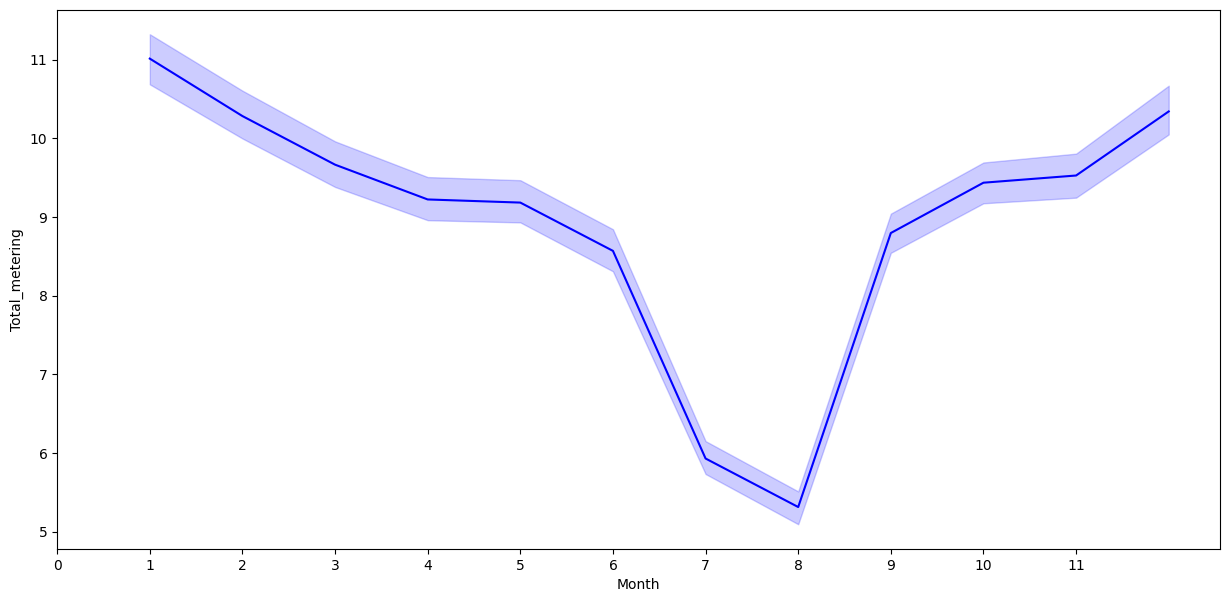

In [39]:
plt.figure(figsize=(15,7))
sns.lineplot(x='Month',y='Total_metering',data=df_sample,color='blue')
list = np.arange(0,12,1)
plt.xticks(list)
plt.show()

<Figure size 1500x1500 with 0 Axes>

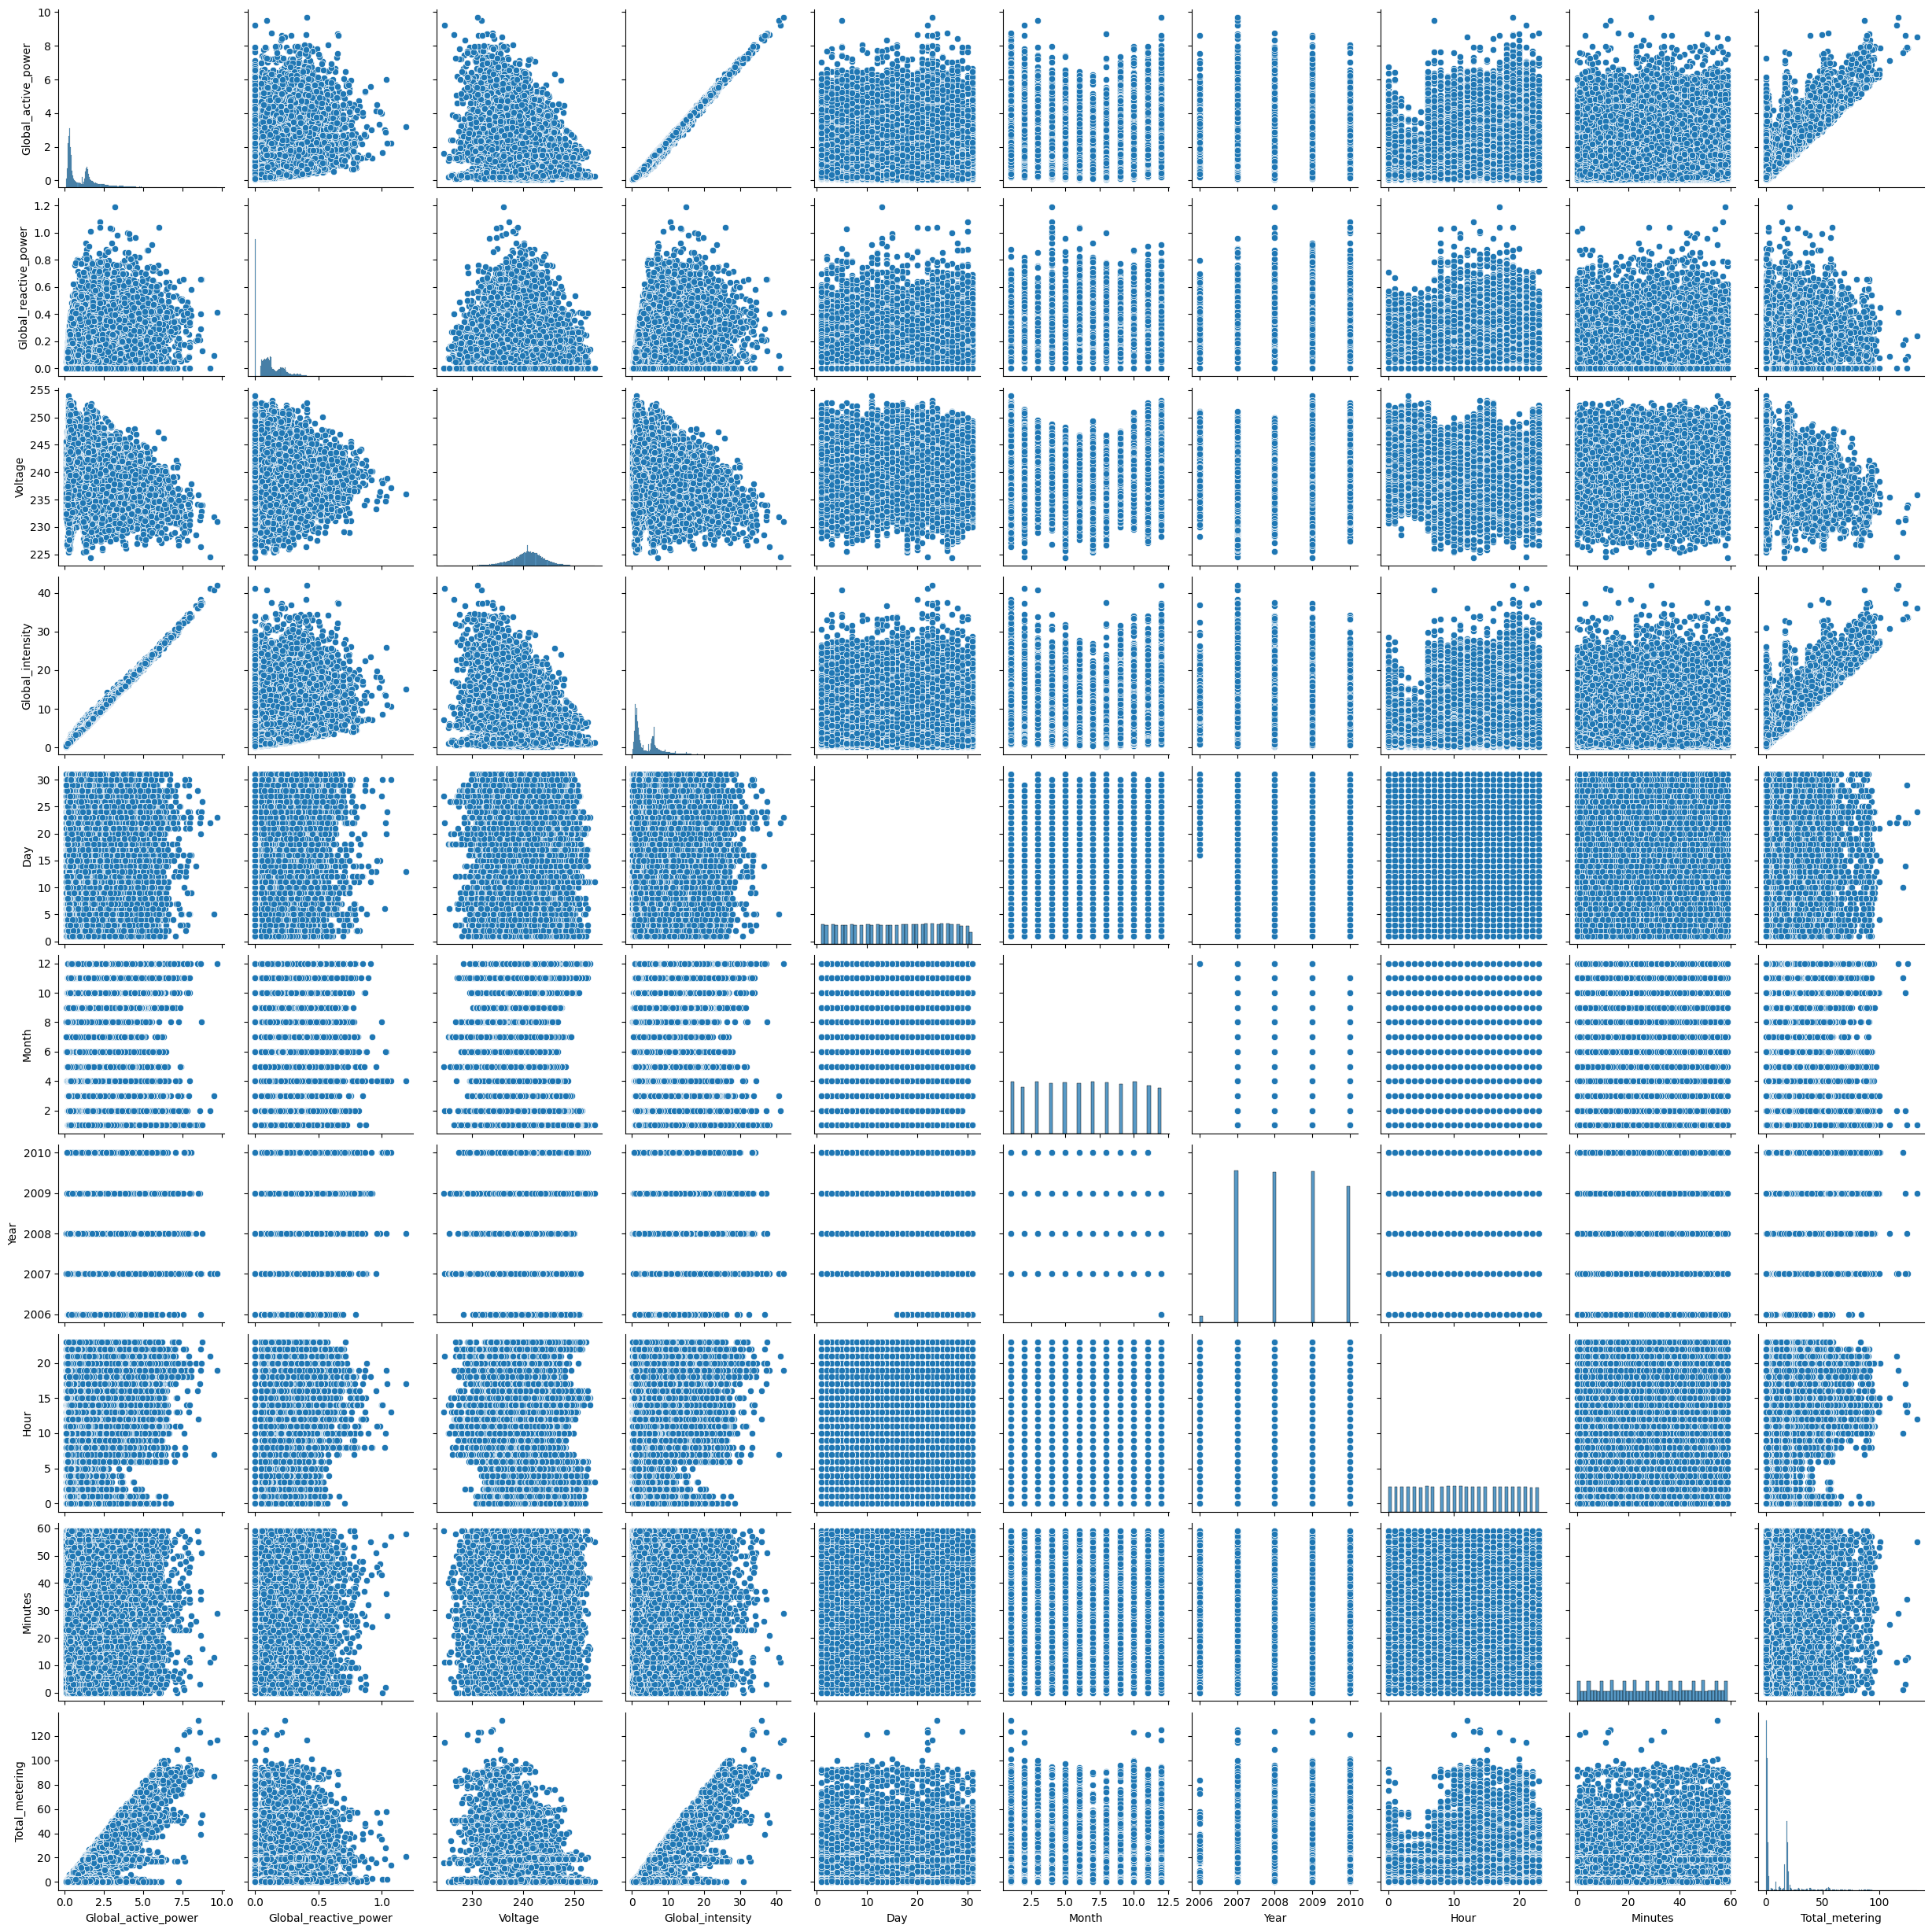

In [40]:
plt.figure(figsize=(15,15))
sns.pairplot(df_sample)
plt.show()

<font size="4"  color="blue">Saving the cleaned data</font>

In [41]:
df_sample.to_csv('cleaned_power_cosumption_data_1.csv')

In [42]:
df_new=pd.DataFrame()

In [43]:
df_new=df_sample

In [44]:
df_new.head()

Global_active_power  Global_reactive_power  Voltage  Global_intensity  Day  \
0                0.216                  0.000   241.03               0.8   28   
1                0.212                  0.116   234.25               1.0   11   
2                0.240                  0.000   247.98               1.0   14   
3                0.290                  0.000   240.81               1.4   27   
4                0.322                  0.140   242.08               1.4   19   

   Month  Year  Hour  Minutes  Total_metering  
0      2  2007    11       50             0.0  
1      8  2007     2       39             0.0  
2      1  2009     4       43             0.0  
3     11  2009     1       38             1.0  
4      9  2008     0       59             2.0

In [45]:
df_new.shape

(100000, 10)

<font size="6"  color="teal">6. Data Preprocessing</font>

<font size="4" color="grey"><strong>Data preprocessing is a process of preparing the raw data and making it suitable for a machine learning model. It is the first and crucial step while creating a machine learning model. It involves cleaning, transforming, and integrating the data to improve its quality and suitability for the specific data mining task</strong></font>

<font size="4" color="blue">Spiltting the input and output feature</font>

In [46]:
X=df_new.drop(['Day','Month','Year','Hour','Minutes','Total_metering'],axis=1)
Y=df_new['Total_metering']

In [47]:
X.head()

Global_active_power  Global_reactive_power  Voltage  Global_intensity
0                0.216                  0.000   241.03               0.8
1                0.212                  0.116   234.25               1.0
2                0.240                  0.000   247.98               1.0
3                0.290                  0.000   240.81               1.4
4                0.322                  0.140   242.08               1.4

In [48]:
Y.head()

0    0.0
1    0.0
2    0.0
3    1.0
4    2.0
Name: Total_metering, dtype: float64

In [49]:
import sklearn

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33)

In [51]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((67000, 4), (33000, 4), (67000,), (33000,))

In [52]:
X_train.head()

Global_active_power  Global_reactive_power  Voltage  Global_intensity
55759                1.424                  0.060   236.28               6.0
48689                3.622                  0.054   238.25              15.2
7007                 2.740                  0.134   240.52              11.4
51991                0.322                  0.210   241.51               1.6
8269                 1.368                  0.098   241.17               5.6

In [53]:
X_test.head()

Global_active_power  Global_reactive_power  Voltage  Global_intensity
71303                1.768                  0.138   240.48               7.4
43135                0.288                  0.094   240.95               1.2
6254                 0.302                  0.062   239.56               1.2
19616                0.304                  0.086   243.81               1.2
44250                0.392                  0.238   243.08               1.8

In [54]:
Y_train.head()

55759    19.0
48689    56.0
7007     20.0
51991     3.0
8269     20.0
Name: Total_metering, dtype: float64

In [55]:
Y_test.head()

71303    0.0
43135    2.0
6254     0.0
19616    0.0
44250    1.0
Name: Total_metering, dtype: float64

In [56]:
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range=(0,1))
X_train_scaled=Scaler.fit_transform(X_train)
X_test_scaled=Scaler.transform(X_test)

In [57]:
X_train_scaled

array([[0.14678299, 0.05576208, 0.40176152, 0.14146341],
       [0.38647764, 0.05018587, 0.46849593, 0.36585366],
       [0.29029444, 0.12453532, 0.54539295, 0.27317073],
       ...,
       [0.02726281, 0.10594796, 0.71138211, 0.02926829],
       [0.01504907, 0.09665428, 0.40582656, 0.0195122 ],
       [0.03598691, 0.18587361, 0.43733062, 0.03902439]])

In [58]:
X_test_scaled

array([[1.84296619e-01, 1.28252788e-01, 5.44037940e-01, 1.75609756e-01],
       [2.29007634e-02, 8.73605948e-02, 5.59959350e-01, 2.43902439e-02],
       [2.44274809e-02, 5.76208178e-02, 5.12872629e-01, 2.43902439e-02],
       ...,
       [1.89749182e-02, 1.13382900e-01, 5.82994580e-01, 2.43902439e-02],
       [4.36205016e-04, 0.00000000e+00, 5.78929539e-01, 0.00000000e+00],
       [1.27589967e-01, 1.61710037e-01, 2.98780488e-01, 1.26829268e-01]])

In [59]:
import statsmodels

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [61]:
vif= pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_train_scaled,i) for i in range(X_train_scaled.shape[1])]
vif['Features']=X_train.columns
vif

vif               Features
0   984.359520    Global_active_power
1     2.912006  Global_reactive_power
2     2.344590                Voltage
3  1027.232886       Global_intensity

<font size="8" color="purple"><strong>Model Building</strong></font>

<font size="6" color="teal">Linear Regression</font>

<font size="4" color="grey">Linear regression is a type of machine learning algorithm that computes the linear relationship between a dependent variable and one or more independent features.</font>

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [63]:
Lreg=LinearRegression()
Lreg=Lreg.fit(X_train_scaled,Y_train)

In [64]:
#prediction
Lreg_pred=Lreg.predict(X_test_scaled)

In [65]:
#Performance metrics
MAE=mean_absolute_error(Y_test,Lreg_pred)
MSE=mean_squared_error(Y_test,Lreg_pred)
RMSE=np.sqrt(MSE)
r2=r2_score(Y_test,Lreg_pred)
training_accuracy=Lreg.score(X_train_scaled,Y_train)
testing_accuracy=Lreg.score(X_test_scaled,Y_test)

In [66]:
print("𝐑𝐞𝐬𝐮𝐥𝐭𝐬 𝐟𝐨𝐫 𝐋𝐢𝐧𝐞𝐚𝐫 𝐑𝐞𝐠𝐫𝐞𝐬𝐬𝐢𝐨𝐧 :- ")
print("The linear regression coefficients are ",Lreg.coef_)
print("Training Accuracy : {:.5f}".format(training_accuracy))
print("Testing Accuracy : {:.5f}".format(testing_accuracy))
print("MAE value: {:.4f}".format(MAE))
print("MSE value: {:.4f}".format(MSE))
print("RMSE value: {:.4f}".format(RMSE))
print("R2 score value:",r2)

𝐑𝐞𝐬𝐮𝐥𝐭𝐬 𝐟𝐨𝐫 𝐋𝐢𝐧𝐞𝐚𝐫 𝐑𝐞𝐠𝐫𝐞𝐬𝐬𝐢𝐨𝐧 :- 
The linear regression coefficients are  [ 199.87279782   -0.94655349   -2.6067754  -113.3418339 ]
Training Accuracy : 0.72064
Testing Accuracy : 0.71538
MAE value: 4.2301
MSE value: 45.9889
RMSE value: 6.7815
R2 score value: 0.7153779729721939
